<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v1:</b>
    
<b>Общее впечатление:</b> 
 
- Отличная работа по анализу A/B-тестирования! В проекте методично проведена предобработка данных, выполнен содержательный анализ результатов эксперимента и сформулированы четкие выводы, подкрепленные фактами. Особенно ценны наблюдения о параметрах теста и оценке его корректности. Структурированные выводы делают исследование понятным и информативным.
- Осталось исправить совсем чуть-чуть для сдачи проекта (буду также рад исправлениям желтых:):
    - Поменять способ подсчета метрик: cделать расчет по уникальным пользователям, а не по сессиям.
    - Изменить формулировку гипотез для второго теста и чуть уточнить общие выводы.
    - Поправить расчет продолжительности теста.
    - Расширить промежуточные выводы.


Буду ждать новую версию на повторную проверку 😇 Успехов!

</div>


<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>
    
Дарья привет! Очень здорово, что ты дополнительно поработала над проектом и внесла улучшения по комментариям! 😇
    
Было интересно проверять твой проект, и мне осталось только пожелать тебе успехов в следующих спринтах. 🍀 Буду также очень рад любому фидбеку и предложениям по улучшению моего код-ревью.
    
А здесь можно найти больше примеров того, как проводить А/Б-тестирование: 

https://habr.com/ru/company/boodet_online/blog/498688/
    
https://vc.ru/u/1174886-koptelnya/413265-chto-takoe-a-b-testirovanie-i-kak-provesti-ego-pravilno-urok-1    
 
    
</div>

# Разработка A/B-тестирования и анализ результатов для развлекательного приложения

В данном исследовании представлены данные развлекательного приложения с функцией «бесконечной» ленты, аналогичной тем, что используются в сервисах коротких видео. В приложении реализованы две модели монетизации: платная подписка (пользователи могут смотреть ленту без рекламы) и реклама (демонстрируется пользователям, которые не оформили подписку). Команда рекомендательных систем разработала новый алгоритм, который, по их предположению, позволит показывать более интересный контент и повысит вовлеченность пользователей.

## 1. Цель и задачи

### Цель
Спроектировать и проанализировать A/B-тест для того, чтобы проверить эффективность нового алгоритма рекомендаций.

### Задачи 
1. Описать дизайн эксперимента (метрика успеха, разбиение пользователей, размер выборки, длительность).
2. Рассчитать необходимые параметры A/B-теста.
3. Провести статистический анализ полученных данных.
4. Сделать вывод статистической значимости нововведения.

## Описание данных

Данные представлены в виде трех таблиц:

[Данные предоставлены Яндекс Практикум](https://clck.ru/3Nkist)  

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

[Данные предоставлены Яндекс Практикум](https://clck.ru/3Nkist)  

## Работа с историческими данными (EDA)

#### Загрузка исторических данных

Импортируем нужные для работы библиотеки и загрузим данные из CSV-файла, чтобы ознакомиться с ними.

In [1]:
# Импортируем библиотеки
import pandas as pd  
import matplotlib as plt
import numpy as np

# Загружаем данные из CSV-файла
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

# Выводим первые 5 строк загруженного DataFrame для предварительного ознакомления с данными
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


In [2]:
# Выведем на экран базовый анализ структуры датафрейма
sessions_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435924 entries, 0 to 435923
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            435924 non-null  object
 1   session_id         435924 non-null  object
 2   session_date       435924 non-null  object
 3   session_start_ts   435924 non-null  object
 4   install_date       435924 non-null  object
 5   session_number     435924 non-null  int64 
 6   registration_flag  435924 non-null  int64 
 7   page_counter       435924 non-null  int64 
 8   region             435924 non-null  object
 9   device             435924 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.3+ MB


#### Знакомство с данными

Для каждого уникального пользователя рассчитаем количество уникальных сессий. После этого выберем одного пользователя с наибольшим количеством сессий и выведем все данные из таблицы для этого пользователя. Изучим его данные, чтобы лучше понять логику формирования каждого столбца

In [3]:
# Группируем данные по 'user_id' и считаем уникальные 'session_id',
# находим максимальное значение
top_user_id = sessions_history.groupby('user_id')['session_id'].nunique().idxmax()

# Выводим все записи сессий этого пользователя
sessions_history[sessions_history['user_id'] == top_user_id]

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


Максимальное количество сессий одного пользователя — 10 сессий. Для каждой сессии представлена информация о дате и времени начала сессии, дате установки приложения, количестве просмотренных страниц, регионе и устройстве пользователя, а также является ли он зарегестрированным.

#### Анализ числа регистраций

Одна из важнейших метрик продукта — число зарегистрированных пользователей. Для того, чтобы проследить ее динамику, агрегируем данные по дням, рассчитывая для каждого дня число уникальных пользователей и число зарегистрированных пользователей. После этого построим линейные графики с динамикой общего числа пользователей и зарегистрированных пользователей по дням и отобразим их на одном графике для наглядного сравнения.

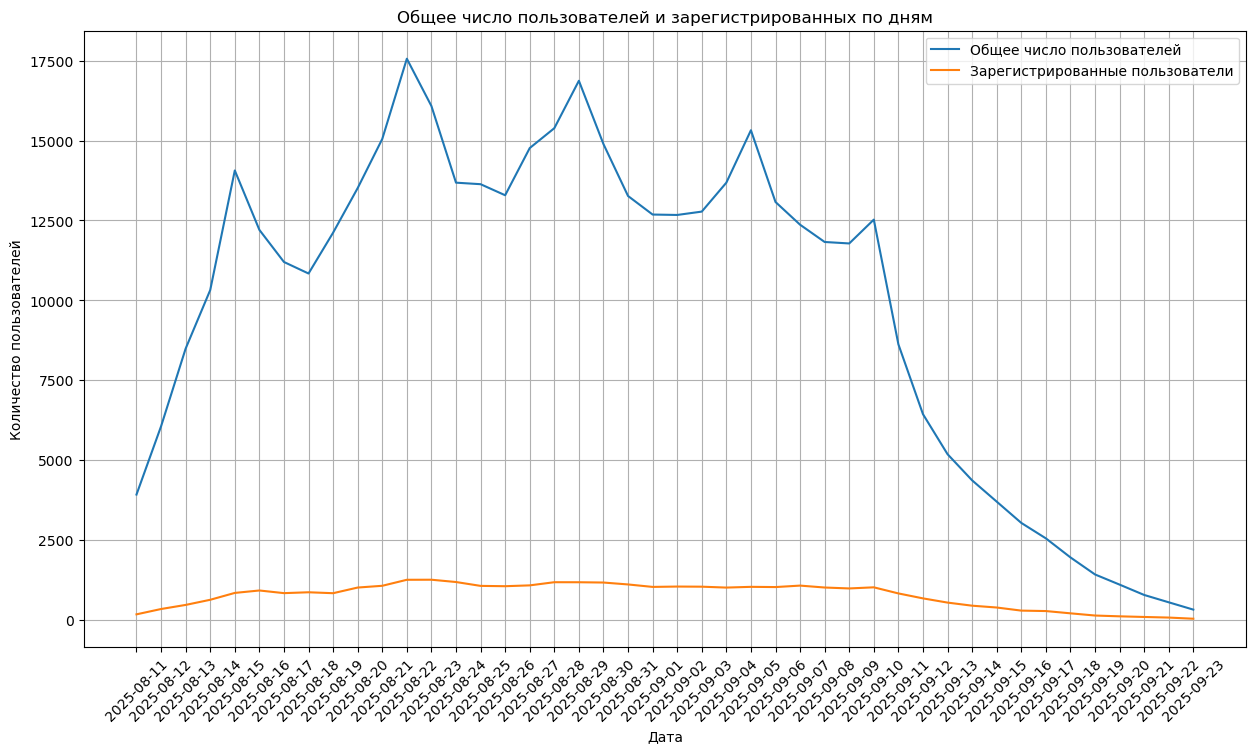

In [4]:
import matplotlib.pyplot as plt

# Группируем по дате
df_grouped = sessions_history.groupby('session_date')

# Считаем уникальных пользователей и зарегистрированных
stats_per_day = df_grouped.agg(
    total_users=('user_id', 'nunique'),
    registered_users=('registration_flag', 'sum')
).reset_index()

x = stats_per_day['session_date']
y_total = stats_per_day['total_users']
y_registered = stats_per_day['registered_users']

# Строим два графика
plt.figure(figsize=(15, 8))
plt.plot(x, y_total, label='Общее число пользователей')
plt.plot(x, y_registered, label='Зарегистрированные пользователи')

plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.title('Общее число пользователей и зарегистрированных по дням')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

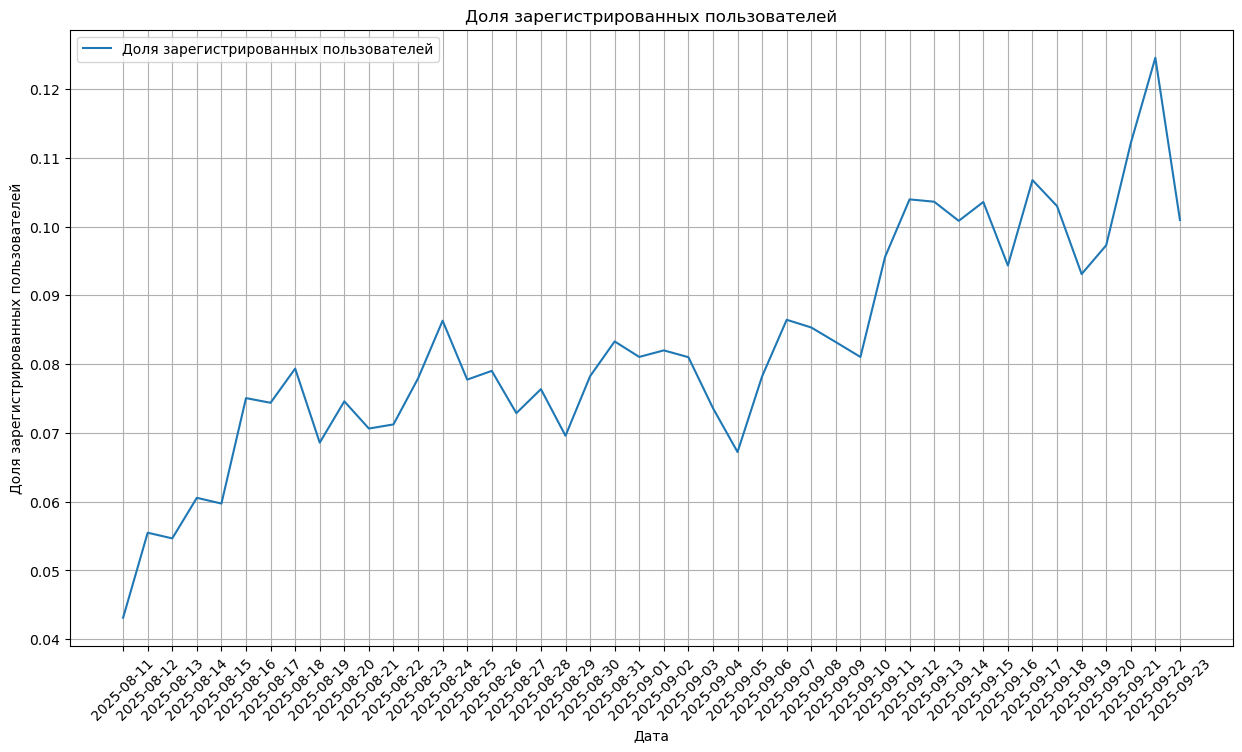

In [5]:
# Вычисляем долю зарегистрированных пользователей
stats_per_day['registered_share'] = stats_per_day['registered_users'] / stats_per_day['total_users']

# Используем даты для оси X
x = stats_per_day['session_date']
y = stats_per_day['registered_share']

# Строим график
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Доля зарегистрированных пользователей')
plt.grid(True)
plt.title('Доля зарегистрированных пользователей')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей')
plt.xticks(rotation=45)
plt.show

#### Анализ числа просмотренных страниц

Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку. Найдем количество сессий для каждого значения количества просмотренных страниц, что отследить динамику этой метрики. 

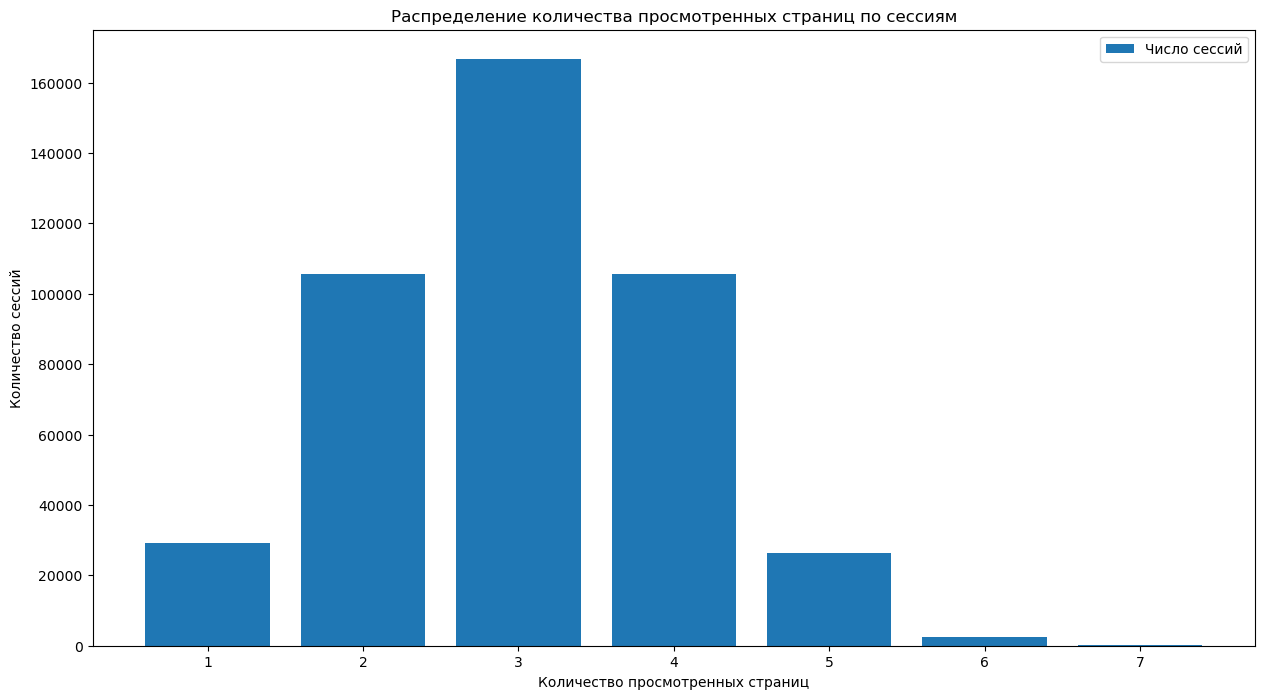

In [6]:
# Группируем данные
pages_stats = sessions_history.groupby('page_counter').size().reset_index(name='page_counter_total')

# Строим столбчатую диаграмму
plt.figure(figsize=(15,8))
plt.bar(pages_stats['page_counter'], pages_stats['page_counter_total'], label='Число сессий')
plt.xlabel('Количество просмотренных страниц')
plt.ylabel('Количество сессий')
plt.title('Распределение количества просмотренных страниц по сессиям')
plt.legend()
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. В датафрейме `sessions_history` создадим дополнительный столбец `good_session`, который будет принимать значение 1, если за одну сессию просмотрено 4 и более страниц, и значение 0, если просмотрено меньше страниц. Затем построим график, отображающий среднее значение доли успешных сессий от всех сессий по дням за весь период наблюдения. Этот показатель является важной прокси-метрикой для оценки вовлеченности пользователей.

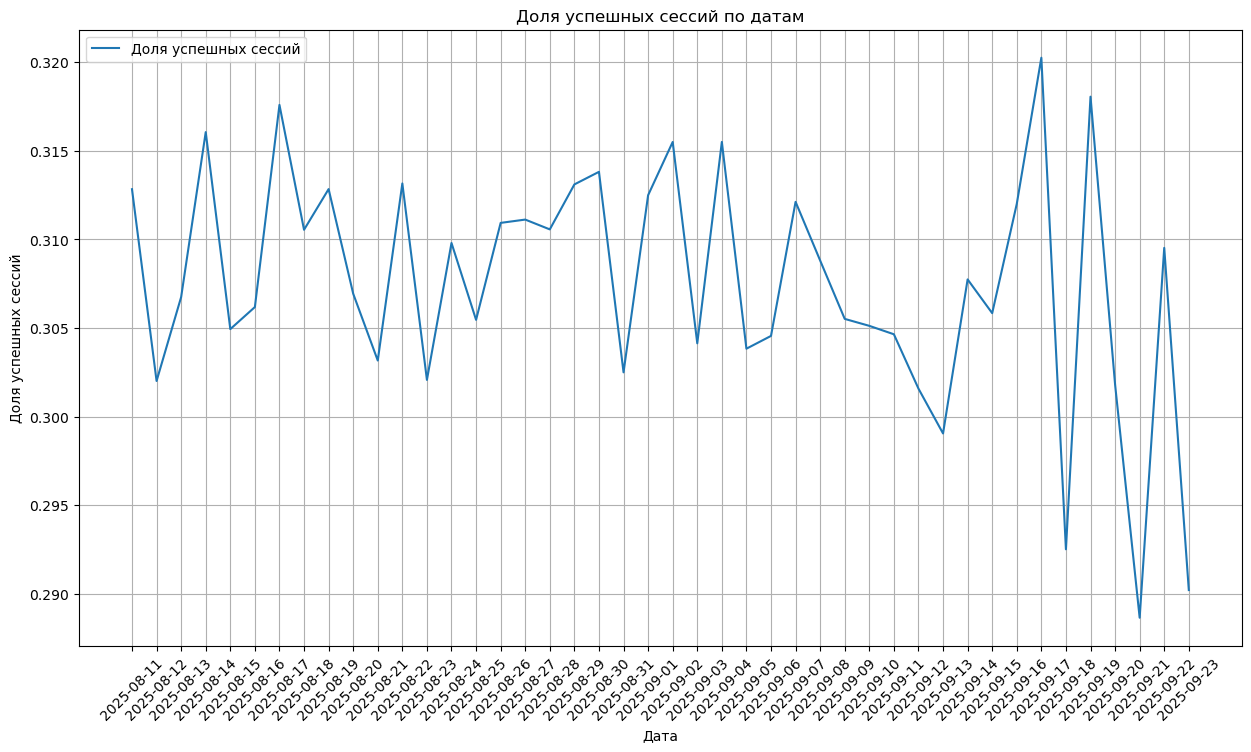

In [7]:
# Создаем столбец 'good_session'
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)

# Группируем по дате
good_sessions_stats = sessions_history.groupby('session_date').agg(
    total_sessions=('session_id', 'count'),
    total_good_sessions=('good_session', 'sum')
).reset_index()

# Находим долю успешных сессий
good_sessions_stats['good_session_share'] = (
    good_sessions_stats['total_good_sessions'] / good_sessions_stats['total_sessions']
)

# Строим график
plt.figure(figsize=(15, 8))
plt.plot(good_sessions_stats['session_date'], good_sessions_stats['good_session_share'], label='Доля успешных сессий')
plt.grid(True)
plt.title('Доля успешных сессий по датам')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Подготовка к тесту

#### Формулировка нулевой и альтернативной гипотез

Нулевая гипотеза: Средняя доля успешных сессий (более 4 просмотренных страниц за сессию) у пользователей, которые просматривали контент с новым рекомендательным алгоритмом, равна средней доле успешных сессий пользователей до внедрения нового алгоритма.

Альтернативная гипотеза: Средняя доля успешных сессий у пользователей, которые просматривали контент с новым рекомендательным алгоритмом, выше средней доли успешных сессий пользователей до внедрения нового алгоритма.

#### Расчёт размера выборки

Рассчитаем необходимое для вашего эксперимента количество пользователей с использованием параметров, заданных продуктовой командой.

- Уровень значимости — 0.05.
- Вероятность ошибки второго рода — 0.2.
- Мощность теста — 0.8.
- MDE — 3%.

In [8]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p = 0.3 # Базовый уровень доли
mde = 0.03 * p  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


#### Расчёт длительности теста

Определим длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения.

In [9]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history.groupby('session_date').agg(avg_daily_users=('user_id', 'nunique'))['avg_daily_users'].mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size * 2 / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 9 дней


## Мониторинг А/В-теста

#### Проверка распределения пользователей

A/B-тест успешно запущен, и на этом этапе нужно убедиться, что пользователи распределены верно. Для того рассчитаем количество уникальных пользователей в каждой группе.

In [10]:
# Загружаем датасет `sessions_test_part`
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

# Группируем пользователей по группе
unique_users_stats = sessions_test_part.groupby('test_group').agg(
    unique_users=('user_id', 'nunique')
)

# Распределяем пользователей в отдельные переменные для удобного анализа
a_unique_users = unique_users_stats.loc['A', 'unique_users']
b_unique_users = unique_users_stats.loc['B', 'unique_users']

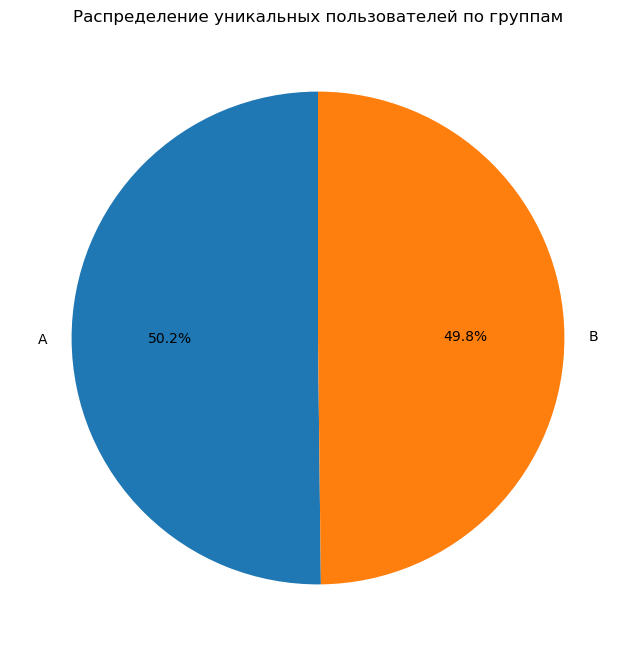

In [11]:
# Задаем параметры круговой диаграммы
groups = ['A', 'B']
values = [a_unique_users, b_unique_users]

# СТроим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(values, labels=groups, autopct='%1.1f%%', startangle=90)
plt.title('Распределение уникальных пользователей по группам')
plt.show()

#### Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, убедимся в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

In [12]:
# Создаем группы пользователей из групп А и В
a_users = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id']
b_users = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id']

# Преобразуем серии в множества и находим их пересечение (общих пользователей)
intersection = list(set(a_users) & set(b_users))
print(f'Пользователей, находящихся в обеих группах: {len(intersection)}')

Пользователей, находящихся в обеих группах: 0


#### Равномерность разделения пользователей по устройствам
Убедимся в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам. Для этого построим две диаграммы.

В качестве устройства пользователя выберем тот тип устройств, который он использовал наиболее часто (наибольшее количество сессий).

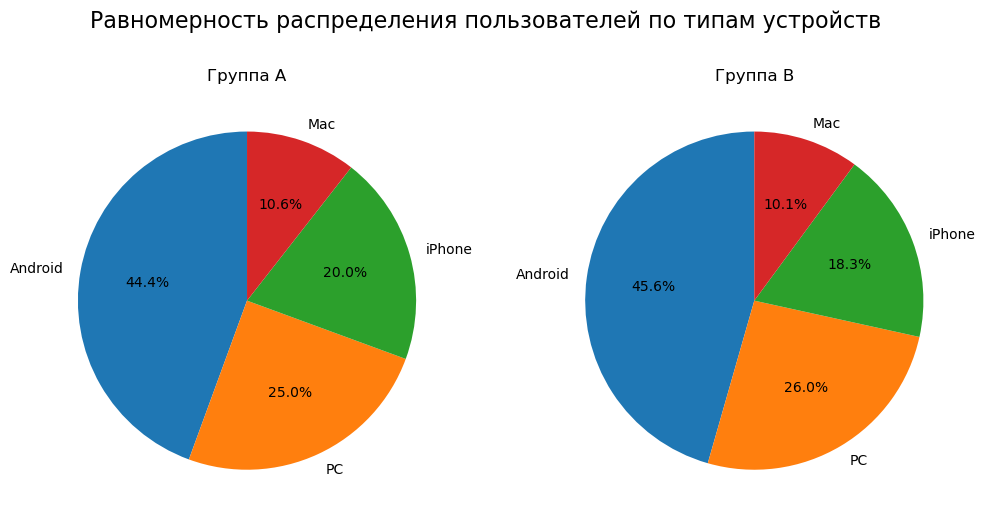

In [13]:
# Функция для получения наиболее часто встречающегося устройства у пользователя
def most_used_device(group):
    return group.value_counts().idxmax()

# Для группы A
group_a = sessions_test_part[sessions_test_part['test_group'] == 'A']
devices_a = group_a.groupby('user_id')['device'].apply(most_used_device)

# Для группы B
group_b = sessions_test_part[sessions_test_part['test_group'] == 'B']
devices_b = group_b.groupby('user_id')['device'].apply(most_used_device)

# Расчет долей устройств среди пользователей
device_share_a = devices_a.value_counts(normalize=True)
device_share_b = devices_b.value_counts(normalize=True)

# Построение диаграмм
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(
    device_share_a,
    labels=device_share_a.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Группа А')

plt.subplot(1, 2, 2)
plt.pie(
    device_share_b,
    labels=device_share_b.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Группа В')

plt.suptitle('Равномерность распределения пользователей по типам устройств', fontsize=16)
plt.show()

#### Равномерность распределения пользователей по регионам

Убедимся в том, что пользователи равномерно распределены по регионам.

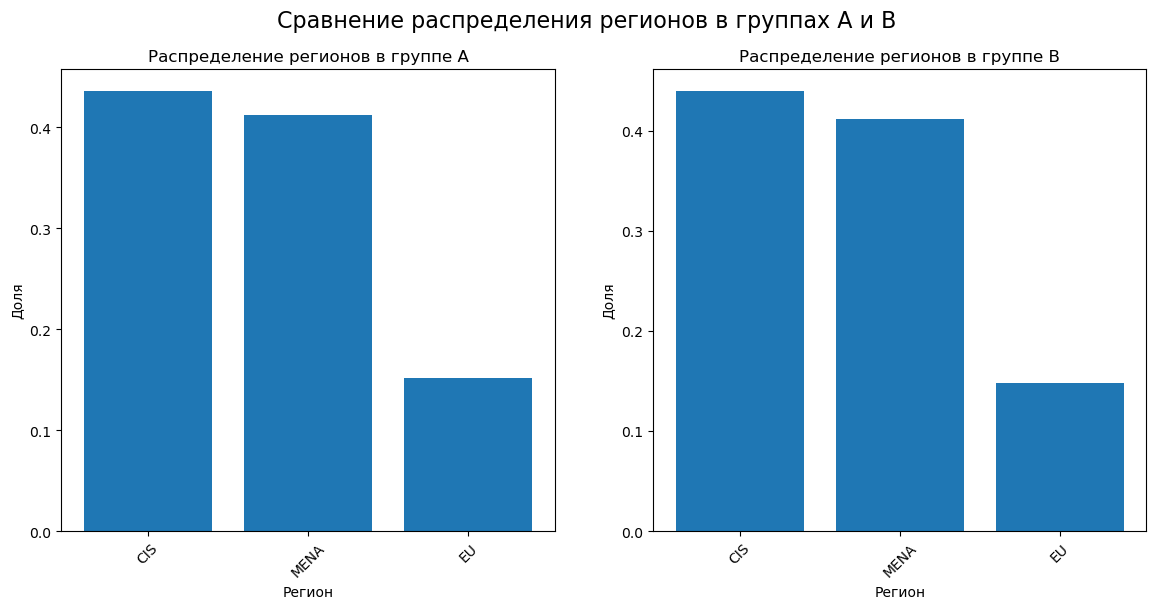

In [14]:
# Функция для получения наиболее часто встречающегося региона у пользователя
def main_region(group):
    return group.value_counts().idxmax()

# Для группы A
region_group_a = sessions_test_part[sessions_test_part['test_group'] == 'A']
region_a = region_group_a.groupby('user_id')['region'].apply(main_region)

# Для группы B
region_group_b = sessions_test_part[sessions_test_part['test_group'] == 'B']
region_b = region_group_b.groupby('user_id')['region'].apply(main_region)

# Расчет долей основных регионов пользователей
regions_share_a = region_a.value_counts(normalize=True)
regions_share_b = region_b.value_counts(normalize=True)

# Создаем фигуру для двух графиков
plt.figure(figsize=(14, 6))

# Строим столбчатую диаграмму для группы A
plt.subplot(1, 2, 1)  # левый график
plt.bar(regions_share_a.index, regions_share_a.values)
plt.title('Распределение регионов в группе A')
plt.xlabel('Регион')
plt.ylabel('Доля')
plt.xticks(rotation=45)

# Строим столбчатую диаграмму для группы B
plt.subplot(1, 2, 2)  # правый график
plt.bar(regions_share_b.index, regions_share_b.values)
plt.title('Распределение регионов в группе B')
plt.xlabel('Регион')
plt.ylabel('Доля')
plt.xticks(rotation=45)

# Общий заголовок для обеих диаграмм
plt.suptitle('Сравнение распределения регионов в группах A и B', fontsize=16)
plt.show()

In [15]:
# Подсчет абсолютных значений для каждой группы
counts_a = region_a.value_counts()
counts_b = region_b.value_counts()

# Объединение в одну таблицу
result_table = pd.DataFrame({
    'Группа A': counts_a,
    'Группа B': counts_b
}).fillna(0).astype(int)  # Заполняем пропуски нулями и приводим к целым числам
result_table

,Группа A,Группа B
region,,
CIS,644,645
MENA,609,604
EU,224,217


### Вывод после проверки A/B-теста:

* Различия в количестве пользователей между группами A и B обнаружено не было. Пользователи группы А составляют 50,2% от числа всех пользователей, что можно считать достаточно равным распределением.
* Выборки являются независимыми. Пересечения пользователей из групп А и В обнаружено не было.
* По катеригориальным переменным (регион, устройство пользователя) равномерное распределение сохраняется.

A/B-тест проходит корректно.

## Проверка результатов A/B-теста

#### Получение результатов теста и подсчёт основной метрики

Создадим дополнительный столбец `good_session`, чтобы отследить динамику сессий с >4 просмотренными страницами. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [16]:
# Загружаем датасет `sessions_test` 
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')

# Создаем столбец `good_session`
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### Проверка корректности результатов теста

Убедимся, что тест проведён корректно. Рассчитаем количество уникальных сессий для каждого дня и обеих тестовых групп с помощью группировки. Затем проверим, что количество уникальных дневных сессий в двух выборках не различается или различия между ними не являются статистически значимыми, используя статистический тест для проверки равенства средних двух выборок. 

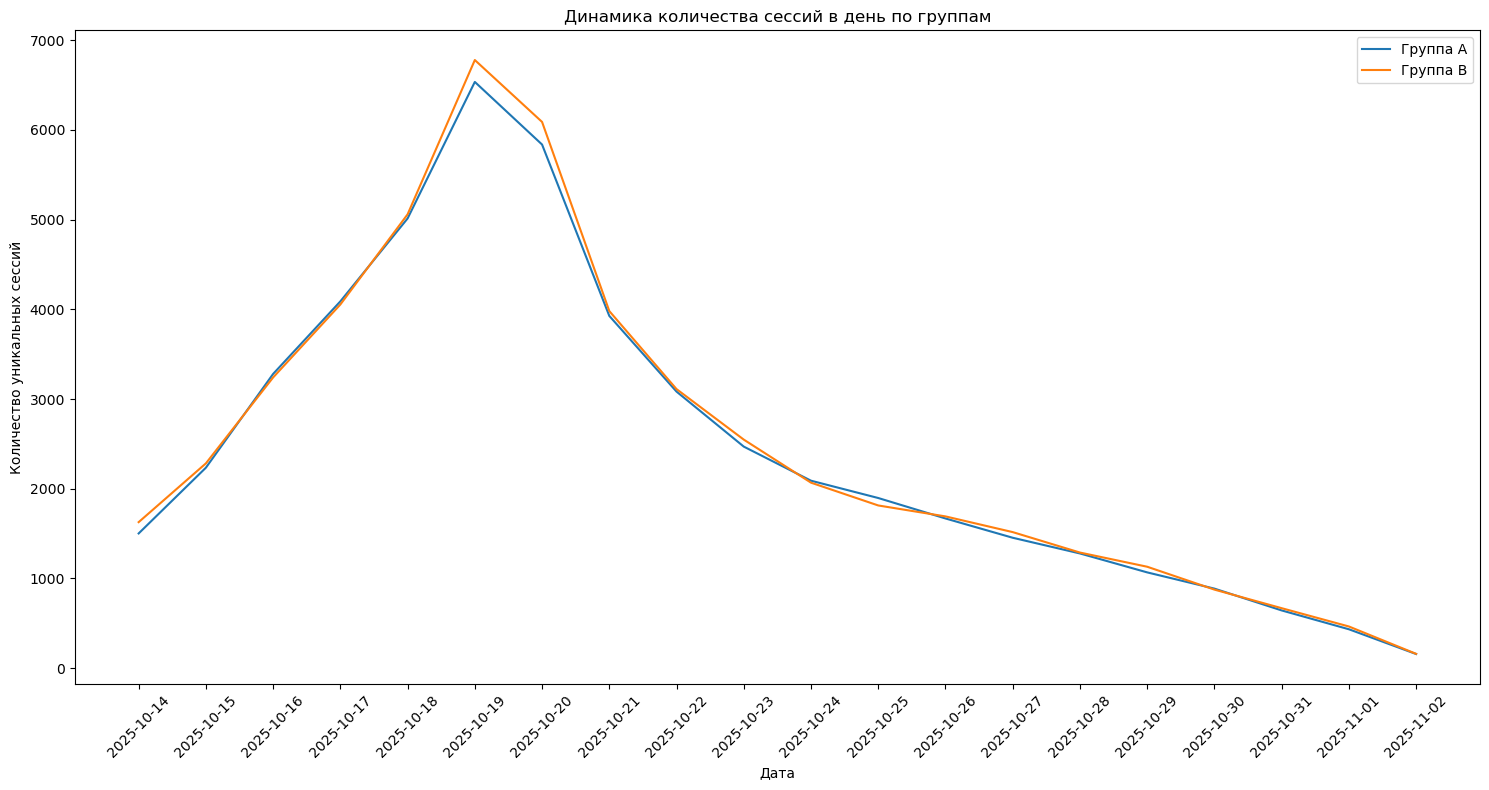

In [17]:
# Группируем по дате и группе, считаем уникальные session_id
grouped = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()

# Создаем серии для групп А и В
group_a = grouped[grouped['test_group'] == 'A']
group_b = grouped[grouped['test_group'] == 'B']

# Строим график
plt.figure(figsize=(15,8))
plt.plot(group_a['session_date'], group_a['session_id'], label='Группа A')
plt.plot(group_b['session_date'], group_b['session_id'], label='Группа B')

plt.xlabel("Дата")
plt.ylabel("Количество уникальных сессий")
plt.title("Динамика количества сессий в день по группам")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Динамика количества сессий в день в обеих группах почти одинакова. Для нахождения p-value проведем t-тест Уэлча.

In [18]:
# Проведем t-тест Уэлча для анализа средних двух выборок
from scipy.stats import ttest_ind

# Задаем уровень значимости
alpha = 0.05

metric_a = group_a['session_id'] # количество уникальных session_id для группы A
metric_b = group_b['session_id'] # количество уникальных session_id для группы B

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    equal_var=False)

print(f'P-value: {p_value_welch_ttest}')

P-value: 0.9382195854082714


Полученное значение p-value больше заданного уровня значимости (0.05), что говорит о том, что нет оснований считать средние различными.

#### Сравнение доли успешных сессий

Когда мы убедились, что количество сессий в обеих выборках не различалось, можем переходить к анализу ключевой метрики — доли успешных сессий. Используем созданный ранее столбец `good_session`, рассчитаем долю успешных сессий для выборок A и B, а также определим разницу между этими показателями. 

In [19]:
# Группируем по дате и группе, считаем сумму успешных сессий и общее число сессий
good_sessions_stats_test = sessions_test.groupby(['session_date', 'test_group']).agg(
    total_sessions=('session_id', 'count'),
    total_good_sessions=('good_session', 'sum')
).reset_index()

# Рассчитываем долю успешных сессий для каждой группы
good_sessions_stats_test['good_session_share_test'] = (
    good_sessions_stats_test['total_good_sessions'] / good_sessions_stats_test['total_sessions']
)

# Вычисляем средние доли по группам A и B, а также разницу
shares = good_sessions_stats_test.groupby('test_group')['good_session_share_test'].mean()
good_sessions_share_a = shares.loc['A']
good_sessions_share_b = shares.loc['B']
diff = good_sessions_share_a - good_sessions_share_b

print(f"Доля успешных сессий в группе A: {good_sessions_share_a:.2f}")
print(f"Доля успешных сессий в группе B: {good_sessions_share_b:.2f}")
print(f"Разница между долями (A - B): {diff:.2f}")

Доля успешных сессий в группе A: 0.31
Доля успешных сессий в группе B: 0.33
Разница между долями (A - B): -0.02


### Вывод

Доля успешных сессий в группе B на 0.02 (или на 2%) выше, чем в контрольной группе А.

#### Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге было подтверждено, что количество успешных сессий в тестовой выборке выше, чем в контрольной, однако делать выводы только на основе этого значения некорректно. Для принятия решения важно определить, является ли наблюдаемое изменение статистически значимым. Проведем статистический тест для оценки значимости разницы в доле успешных сессий между группами.

Для принятия решения о том, является ли это изменение статистически значимым, проведем Z-тест пропорций, так как предстоит сделать вывод о значимости изменения в метрике-доле. Для проведения Z-теста пропорций для начала убедимся в достаточном количестве данных.

In [20]:
# Установим размеры выборок A и B
n_a = sessions_test[sessions_test.test_group=='A'].shape[0]
n_b = sessions_test[sessions_test.test_group=='B'].shape[0] 

# Группируем по группе и считаем сумму успешных сессий
good_sessions_sum = good_sessions_stats_test.groupby('test_group')['total_good_sessions'].sum()

# Получаем количество успешных сессий для группы А и Б
m_a = good_sessions_sum.loc['A']
m_b = good_sessions_sum.loc['B']

p_a, p_b = m_a/n_a, m_b/n_b # рассчитываем доли успехов для каждой группы: A и B

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется.')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется.')

Предпосылка о достаточном количестве данных выполняется.


In [21]:
# Проведем Z-тест пропорций
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller'
)
print(f'P-value: {p_value_ztest}')
if p_value_ztest < alpha:
    print("Изменение в доле успешных сессий статистически значимо. Мы можем отвергнуть нулевую гипотезу об отсутствии различий между группами.")
else:
    print("Нет статистически значимого изменения в доле успешных сессий. Недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу.")

P-value: 0.0001574739988036123
Изменение в доле успешных сессий статистически значимо. Мы можем отвергнуть нулевую гипотезу об отсутствии различий между группами.


По результатам Z-теста пропорций можно сделать следующий вывод:

Значение p-value равно 0.00016, что значительно ниже уровня значимости 0.05. Это говорит о наличии статистически значимого различия между средней долей успешных сессий (более 4 просмотренных страниц за сессию) у пользователей, которые просматривали контент с новым рекомендательным алгоритмом, и средней доле успешных сессий пользователей до внедрения нового алгоритма. 

## Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста можно сделать следующие выводы для команды разработки приложения:

* В рамках эксперимента было задействовано 82080 пользователей, которые разделены на две группы по 41040 пользователей в каждой группе: контрольную (до внедрения нового алгоритма) и тестовую (с новым алгоритмом). Длительность эксперимента составила 9 дней. Обе группы были сбалансированы по ключевым характеристикам, что обеспечило корректность сравнения.
* Параметры теста:
   - Уровень значимости — 0.05  
   - Вероятность ошибки второго рода — 0.2  
   - Мощность теста — 0.8
   - Минимальный детектируемый эффект (MDE) — 3%  
   - Необходимый размер выборки для каждой группы — 41040 пользователей
* Внедрение нового рекомендательного алгоритма привело к статистически значимому росту доли успешных сессий. Анализ показал, что показатели выросли относительно контрольной группы, что свидетельствует о наличии заметного эффекта от нововведения.
* Значение p-value для Z-теста пропорций составляет 0.00016, что значительно ниже уровня значимости 0.05. Это означает, что нулевая гипотеза о равенстве долей успешных сессий между группами отвергается. Таким образом, было выявлено статистически значимое различие в доле успешных сессий между пользователями после внедрения нового алгоритма и до него.

Учитывая, что тест показал статистическую значимость, рекомендуется внедрять новый алгоритм в основное приложение. Это свидетельствует о наличии значимого эффекта и оправдывает использование данного нововведения для дальнешйнего развития приложения. В дальнейшем можно провести дополнительные исследования для оптимизации этого алгоритма, но на данном этапе внедрение целесообразно.